# What Do People Want To Know About Data Science?

## Introduction:
  We are trying to figure out the what kind of content that is required for a rich data science educational material. Our goal is to explore the <a href ='https://datascience.stackexchange.com/'>Data Science Stack Exchange</a> website and see the kind of questons people ask partaining to data science and then somehow create our educational material around it.

## Data Science Stack Exchange
What kind of questions are welcomed on this site?
1. Questions which are directly related to data science.
2. Questions that are not subjective or opinion-based.
3. Questions without too many possible answers or that wouldn't require an extremely long answer.
Because the topics of the questions asked are all data science related, they will be useful to our goal.

The Stack Exchange <a href ='https://datascience.stackexchange.com/'>Home</a> page is subdivided into:
* <a href= 'https://datascience.stackexchange.com/questions'>Questions<a/> - Which is a list of all the questions asked by users.
* <a href= 'https://datascience.stackexchange.com/tags'>Tags</a> -These are keywords that categorise questions.
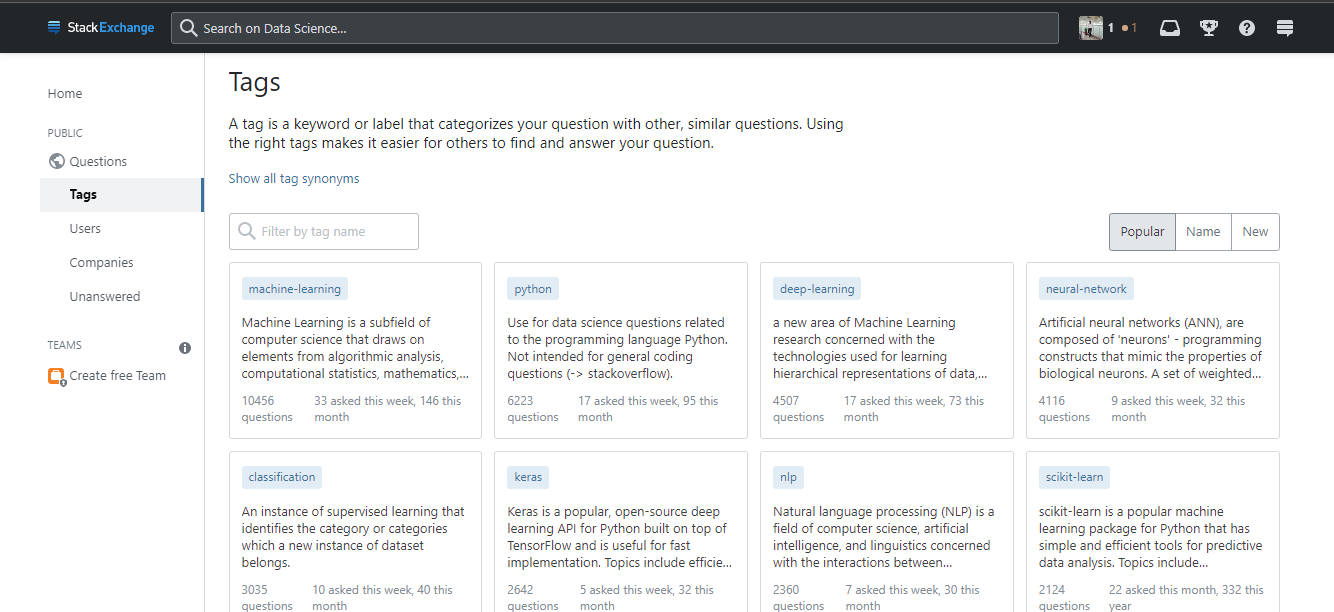
* <a href='https://datascience.stackexchange.com/users'>Users</a> - A list of all users.
* <a href='https://datascience.stackexchange.com/unanswered'>Unanswered</a> - A list of unanswered questions.

## Investigating Stack Exchange Data Explorer.
The stack exchange website has a database in their stack explorer page that we can use to ivestigate the data on the site. From the schema of the database we found some tables relevant to our project. The tags table  for example shows us the amount of time a particular tag has been used but there is no way to figure out if the tag was used recently or a long time ago and so we can't know if there is currently interests in these tags or not. Below is the top 5 result after querying the tags table.

|Id|	TagName|	Count|	ExcerptPostId|	WikiPostId|
|:--:|:--------:|:------:|:--------------:|:------------:|
|1	|definitions|	37|	105|	104	|	
|2	|machine-learning	|10440	|4909	|4908	
|3	|bigdata|	450|	66|	65	|	
|3  |data-mining|	1145|	80|	79|		
|6	|databases|	91|	8960|	8959|	

The posts table is more relevant for our analysis because it contains information on tags, the view count, scores, creation date, etc. We are going to limit the scope of our analysis to posts created from 2021 because we are only concerned with recent interests in data science. Exploring the Posts table in the stack exchange database, this is what the top 5 rows look like.
Using the query below, We got the resulting table. The data from the post table is what will be used for this analysis.

SELECT TOP 5

      Id,
      CreationDate,
      Tags,
      Score,
      ViewCount,
      AnswerCount,
      FavoriteCount
 FROM Posts
 
WHERE PostTypeId = 1 
  AND YEAR(CreationDate) = 2021 ;

|Id	|CreationDate|	Tags|	Score|	ViewCount|	AnswerCount|	FavoriteCount|
|:--:|:--------:|:-----:|:-----:|:-----:|:------:|:--------:|
|87391|	01/01/2021 03:10|	`decision-trees`|	1	|39	|1	|    |
|87392|	01/01/2021 07:28|	`machine-learning` `python` `deep-learning` `image-classification` `image-preprocessing`|	0	|57	|1|  |	
|87393|	01/01/2021 08:07|	`neural-network` `deep-learning` `inception`|	1 |	22|	0	|  |
|87395|	01/01/2021 10:31|	`machine-learning` `cloud` `federated-learning`|	1	|50|	1|	1|
|87404|	01/01/2021 18:00|	`reinforcement-learning` `openai-gym`|	1|	65|	1	|  |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns
style.use('seaborn')

questions = pd.read_csv('2021_questions.csv', parse_dates=['CreationDate'])
questions

,Id,CreationDate,Tags,Score,ViewCount,AnswerCount,FavoriteCount
0,87391,2021-01-01 03:10:42,<decision-trees>,1,39,1,NaN
1,87392,2021-01-01 07:28:07,<machine-learning><python><deep-learning><imag...,0,57,1,NaN
2,87393,2021-01-01 08:07:33,<neural-network><deep-learning><inception>,1,22,0,NaN
3,87395,2021-01-01 10:31:51,<machine-learning><cloud><federated-learning>,1,50,1,1.0
4,87404,2021-01-01 18:00:21,<reinforcement-learning><openai-gym>,1,65,1,NaN
...,...,...,...,...,...,...,...
5779,106589,2021-12-31 14:19:06,<machine-learning><python><scikit-learn><data>...,0,25,1,NaN
5780,106592,2021-12-31 15:49:20,<deep-learning><overfitting>,1,45,2,NaN
5781,106593,2021-12-31 19:41:13,<feature-selection><markov-hidden-model>,1,65,2,NaN
5782,106596,2021-12-31 22:37:42,<machine-learning><linear-regression><cost-fun...,1,23,1,NaN


In [2]:
### df.info() method gives us basic information about the data frame like null count and datatypes of columns
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5784 entries, 0 to 5783
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             5784 non-null   int64         
 1   CreationDate   5784 non-null   datetime64[ns]
 2   Tags           5784 non-null   object        
 3   Score          5784 non-null   int64         
 4   ViewCount      5784 non-null   int64         
 5   AnswerCount    5784 non-null   int64         
 6   FavoriteCount  575 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 316.4+ KB


We can see that only the `FavoriteCount` column has null values. Since the `FavoriteCount` column is a numeric column, we are going to replace all null values with a count of 0. 
The Tags column is a string datatype that looks like this `"<machine-learning><regression><linear-regression><regularization>"
</regularization></linear-regression></regression></machine-learning>` .
We are going to clean it to obtain something that looks like this `"machine-learning,regression,linear-regression,regularization"`.

## Cleaning the Columns.

In [3]:
### Replaces null values in the column with 0 and then converts the column to an int datatype.
questions['FavoriteCount'] = questions['FavoriteCount'].fillna(0)
questions['FavoriteCount'] = questions['FavoriteCount'].astype(int)

In [4]:
### Replaces all string characters that starts with either <,/,>, $ with an empty string
### splits the string by the '><' delimeter and returns a list containing the strings.
questions['Tags'] = questions['Tags'].str.replace('^<|>$', '', regex=True).str.split('><')

In [5]:
questions

,Id,CreationDate,Tags,Score,ViewCount,AnswerCount,FavoriteCount
0,87391,2021-01-01 03:10:42,[decision-trees],1,39,1,0
1,87392,2021-01-01 07:28:07,"[machine-learning, python, deep-learning, imag...",0,57,1,0
2,87393,2021-01-01 08:07:33,"[neural-network, deep-learning, inception]",1,22,0,0
3,87395,2021-01-01 10:31:51,"[machine-learning, cloud, federated-learning]",1,50,1,1
4,87404,2021-01-01 18:00:21,"[reinforcement-learning, openai-gym]",1,65,1,0
...,...,...,...,...,...,...,...
5779,106589,2021-12-31 14:19:06,"[machine-learning, python, scikit-learn, data,...",0,25,1,0
5780,106592,2021-12-31 15:49:20,"[deep-learning, overfitting]",1,45,2,0
5781,106593,2021-12-31 19:41:13,"[feature-selection, markov-hidden-model]",1,65,2,0
5782,106596,2021-12-31 22:37:42,"[machine-learning, linear-regression, cost-fun...",1,23,1,0


## Getting Tag Count
Here we want to find out how many times each individual tag was used.

In [6]:
tag_count = {}
for tags in questions['Tags']:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

used_tags = pd.DataFrame.from_dict(tag_count, orient='index', columns=['count'])
used_tags
        
        

,count
decision-trees,120
machine-learning,1553
python,1080
deep-learning,838
image-classification,134
...,...
alex-net,1
scatter-index,1
conda,1
bahdanau,1


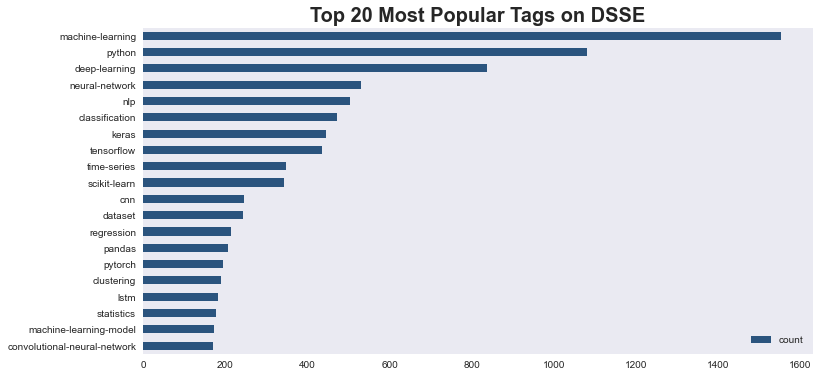

In [7]:
### shows a bar plot of the top 20 tags
ax = used_tags.sort_values('count').tail(20).plot(kind='barh', figsize=(12, 6), color='#2B547E')
ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)
ax.grid(False)
ax.set_title('Top 20 Most Popular Tags on DSSE',
             size=20, weight='bold' )
plt.show()

## Getting Tag Views.
Here we want to find out how many time a tag was viewed.

In [8]:
tag_view_count ={}
for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']

viewed_tags = pd.DataFrame.from_dict(tag_view_count, orient='index', columns=['views'])
viewed_tags

,views
decision-trees,11114
machine-learning,184968
python,275109
deep-learning,128209
image-classification,29532
...,...
alex-net,39
scatter-index,791
conda,122
bahdanau,23


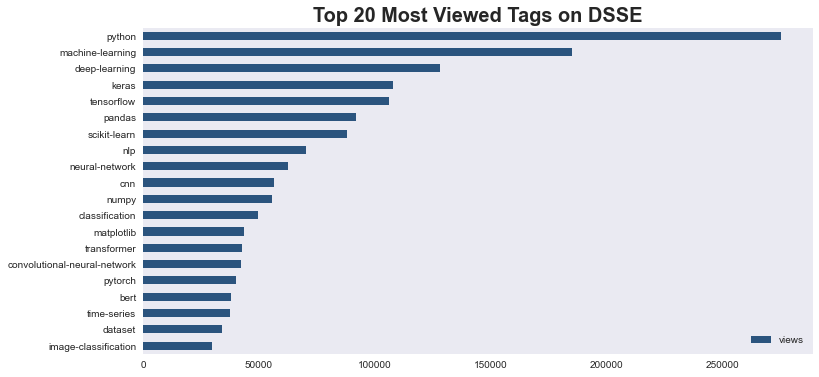

In [9]:
### shows a bar plot of the top 20 most viewed tags
ax = viewed_tags.sort_values('views').tail(20).plot(kind='barh', figsize=(12, 6), color='#2B547E')
ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)
ax.grid(False)
ax.set_title('Top 20 Most Viewed Tags on DSSE',
             size=20, weight='bold' )
plt.show()

## Comparing Tags Relationships

In [10]:
top_10_used_tags = used_tags.sort_values('count').tail(10)
top_10_viewed_tags = viewed_tags.sort_values('views').tail(10)

print(top_10_used_tags, top_10_viewed_tags, sep='\n \n')

                  count
scikit-learn        343
time-series         347
tensorflow          436
keras               446
classification      473
nlp                 504
neural-network      531
deep-learning       838
python             1080
machine-learning   1553
 
                   views
cnn                56614
neural-network     62536
nlp                70365
scikit-learn       87914
pandas             91764
tensorflow        106175
keras             107719
deep-learning     128209
machine-learning  184968
python            275109


The results for the top 10 most used tags seems to closely match that of the top 10 most viewed tags. From the results above, we can see that the tags ae mainly centred around AI, machine learning, and deep learning. So we can infer that those are the main areas of data science that pique people's interest currently.

Before we officially make our recommendation, it would be nice to solidify our findings with additional proof. More specifically, one thing that comes to mind is "Is deep learning just a fad?" Ideally, the content we decide to create will be the most useful for as long as possible. Could interest in deep learning be slowing down? 

## Reading In The Dataset For All Questions. 

In [11]:
all_questions = pd.read_csv('all_questions.csv', parse_dates=['CreationDate'])
all_questions

,Id,CreationDate,Tags
0,5,2014-05-13 23:58:30,<machine-learning>
1,7,2014-05-14 00:11:06,<education><open-source>
2,14,2014-05-14 01:25:59,<data-mining><definitions>
3,15,2014-05-14 01:41:23,<databases>
4,16,2014-05-14 01:57:56,<machine-learning><bigdata><libsvm>
...,...,...,...
33599,56405,2019-07-25 21:13:31,<machine-learning><optimization><gradient-desc...
33600,56406,2019-07-25 21:32:27,<nlp><search-engine>
33601,56407,2019-07-25 21:57:55,<keras><kernel>
33602,56409,2019-07-25 23:04:38,<python><google><cloud><google-data-studio>


Our all creation dataframe doesn't have as much columns as the 2019_questions because our only interests here are the tags and creation date. We are going to clean the tag column like we did with the previous dataset.

In [12]:
all_questions['Tags'] = all_questions['Tags'].str.replace('^<|>$', '', regex=True).str.split('><')
all_questions

,Id,CreationDate,Tags
0,5,2014-05-13 23:58:30,[machine-learning]
1,7,2014-05-14 00:11:06,"[education, open-source]"
2,14,2014-05-14 01:25:59,"[data-mining, definitions]"
3,15,2014-05-14 01:41:23,[databases]
4,16,2014-05-14 01:57:56,"[machine-learning, bigdata, libsvm]"
...,...,...,...
33599,56405,2019-07-25 21:13:31,"[machine-learning, optimization, gradient-desc..."
33600,56406,2019-07-25 21:32:27,"[nlp, search-engine]"
33601,56407,2019-07-25 21:57:55,"[keras, kernel]"
33602,56409,2019-07-25 23:04:38,"[python, google, cloud, google-data-studio]"


## Tag Classification.
Here we are going to classify the tags into two categories. 1 Signifies that the tag is about Deep Learning and Machine Learning and 0 for other tags.

In [13]:
def tag_category(tags):
    ### returns the value of 1 if the tags in a column is contained in the list below and 0 if it isn't.
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

In [14]:
all_questions['deep_learning'] = all_questions['Tags'].apply(tag_category)
all_questions

,Id,CreationDate,Tags,deep_learning
0,5,2014-05-13 23:58:30,[machine-learning],0
1,7,2014-05-14 00:11:06,"[education, open-source]",0
2,14,2014-05-14 01:25:59,"[data-mining, definitions]",0
3,15,2014-05-14 01:41:23,[databases],0
4,16,2014-05-14 01:57:56,"[machine-learning, bigdata, libsvm]",0
...,...,...,...,...
33599,56405,2019-07-25 21:13:31,"[machine-learning, optimization, gradient-desc...",0
33600,56406,2019-07-25 21:32:27,"[nlp, search-engine]",0
33601,56407,2019-07-25 21:57:55,"[keras, kernel]",1
33602,56409,2019-07-25 23:04:38,"[python, google, cloud, google-data-studio]",0


## Grouping The Data By Year.
Sice we ae comparing with 2021 questions we are going to limit the maximum year to 2021

In [15]:
all_questions['year'] = all_questions['CreationDate'].dt.year

In [16]:
filt = all_questions['year'] < 2022
dl_questions = all_questions.copy()[filt]

In [17]:
year_group = dl_questions.groupby('year').agg({"deep_learning": ['sum', 'size']})
year_group.columns = ['deep_learning_questions', 'total_questions']

In [18]:
year_group.reset_index(inplace=True)

In [19]:
year_group['deep_learning_rate'] = round(year_group['deep_learning_questions']/year_group['total_questions'], 2)*100
year_group

,year,deep_learning_questions,total_questions,deep_learning_rate
0,2014,43,559,8.0
1,2015,156,1161,13.0
2,2016,554,2113,26.0
3,2017,1058,2917,36.0
4,2018,2302,5326,43.0
5,2019,2627,6758,39.0
6,2020,2330,6143,38.0
7,2021,2072,5784,36.0


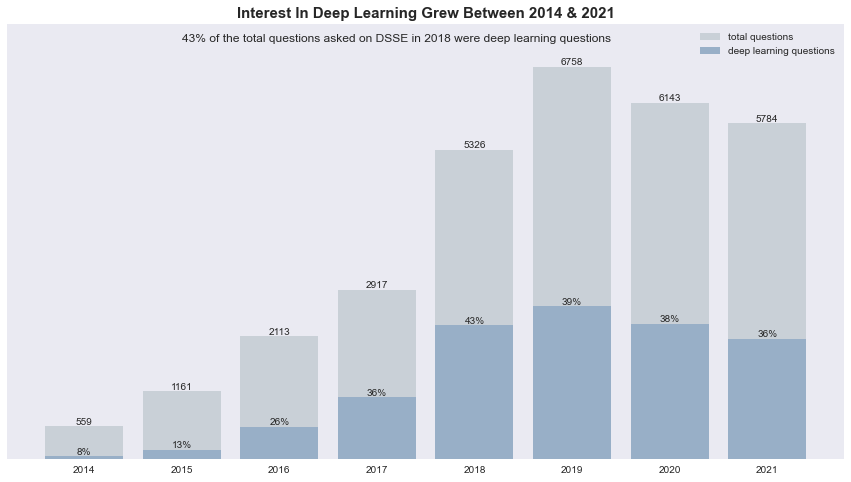

In [20]:
plt.figure(figsize=(15, 8))
bar1 = plt.bar(year_group.year, year_group.total_questions, label='total questions', 
               color='#bcc6cc', alpha=0.7)
bar2 = plt.bar(year_group.year, year_group.deep_learning_questions,
               label='deep learning questions', color='#98afc7')
percentages = year_group.deep_learning_rate
for rect, i in zip(bar2, percentages):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, f'{i:.0f}%', ha='center', va='bottom')
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, f'{height:.0f}', ha='center', va='bottom')
plt.grid(False)
plt.yticks([])
plt.ylim(0,7500)
plt.legend()
plt.text(2015, 7200, '43% of the total questions asked on DSSE in 2018 were deep learning questions',
        size=12)
plt.title('Interest In Deep Learning Grew Between 2014 & 2021',
         size=15, weight='bold')
plt.show()

## Conclusion:
When we started this project, we set out to find what type of content to create for a data science educational material. We decided to explore the stack exchange website and pull data from their database. Using the relationships between question tags and topics we were able to find out that the most frequently asked questions in 2021 were questions related to machine learning and deep learning. To be sure that the interests in deep learning wasn't just a fad we further investigated the questions from all of the years prior to 2021 and we found out the following:
1. Interests in deep learning has grown since 2014.
2. There seemed to be a huge increase in deep learning questions between 2014 and 2018 which has platued since then.
3. At its peak, 43% of all the questions asked on the site in 2018 were deep learning question.